## 导入数据

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('Advertising.csv', 
                 usecols = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [8]:
df = pd.read_csv('Advertising.csv', 
                 usecols = [1, 2, 3, 4])

## 训练模型

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression().fit(df[['TV', 'Radio', 'Newspaper']], df['Sales'] )

## 模型预测

In [14]:
y_predcit = model.predict(df[['TV', 'Radio', 'Newspaper']])

In [17]:
df['y_predcit'] = y_predcit 

In [18]:
df

,TV,Radio,Newspaper,Sales,y_predcit
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342
196,94.2,4.9,8.1,9.7,8.165312
197,177.0,9.3,6.4,12.8,12.785921
198,283.6,42.0,66.2,25.5,23.767321


## 可视化

In [19]:
import matplotlib.pyplot  as plt 

<Figure size 1200x400 with 0 Axes>

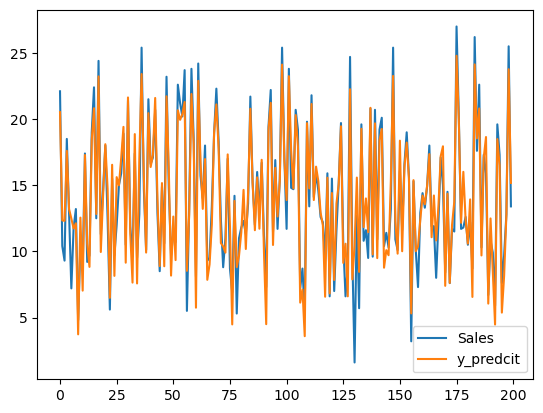

In [24]:
plt.figure(figsize=(12, 4))
_ = df[['Sales', 'y_predcit']].plot()

## 性能评估

In [25]:
from  sklearn.metrics import  r2_score

In [26]:
r2_score(df['Sales'], y_predcit)

0.8972106381789522

## 模型的细节

In [31]:
model.intercept_

2.9388893694594085

In [33]:
type(model.coef_)

numpy.ndarray

In [34]:
import numpy as np

In [40]:
df

,TV,Radio,Newspaper,Sales,y_predcit
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342
196,94.2,4.9,8.1,9.7,8.165312
197,177.0,9.3,6.4,12.8,12.785921
198,283.6,42.0,66.2,25.5,23.767321


In [39]:
df.values[:,:-2] @ model.coef_ + model.intercept_

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

## ver2 ：数据分割

In [41]:
import pandas as pd 

In [42]:
df = pd.read_csv('Advertising.csv', usecols= [1, 2, 3,4])

In [49]:
X, y = df[['TV', 'Radio', 'Newspaper']], df['Sales']

In [50]:
from sklearn.model_selection  import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression().fit(X_train, y_train)

In [55]:
y_predcit_on_test = model.predict(X_test)

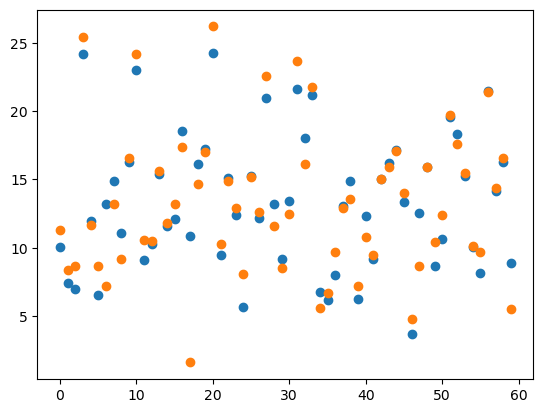

In [62]:
plt.scatter(range(len(y_test)),y_predcit_on_test)
plt.scatter(range(len(y_test)),y_test)
plt.show()

In [61]:
r2_score(y_test, y_predcit_on_test)

0.8649018906637793